In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
%matplotlib inline

In [45]:
df = pd.read_csv('creditcard.csv')

In [46]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
df.shape

(284807, 31)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
cols = pd.Series(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [49]:
classes = df['Class'].value_counts()
print(classes)

0    284315
1       492
Name: Class, dtype: int64


In [50]:
classes/sum(classes)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [51]:
def prep_data(df):
    X = df.iloc[:, 1:30]
    X = np.array(X).astype(np.float64)
    y = df.iloc[:, 30]
    return X, y

X, y = prep_data(df)

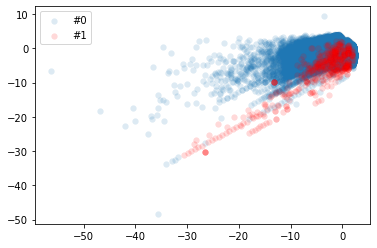

In [52]:
def plot_data(X, y):
    plt.scatter(X[y == 0, 0], X[y == 0, 2], label = "#0", alpha=0.15, linewidth=0.15) #V1 by V3
    plt.scatter(X[y == 1, 0], X[y == 1, 2], label = "#1", alpha=0.15, linewidth=0.15, c='r') #V1 by V3
    plt.legend()
    return plt.show()

plot_data(X, y)

<h1>Modeling</h1>

In [53]:
def prep_data(df):
    X = df.iloc[:, 1:30]
    X = np.array(X).astype(np.float64)
    y = df.iloc[:, 30]
    return X, y

X, y = prep_data(df)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, average_precision_score
from numpy import mean

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [15]:
#Logistic Regression CV
lr_cv = LogisticRegression(random_state=0, max_iter = 5000)
scores1 = cross_val_score(lr_cv, X_train, y_train, cv=cv, scoring='f1')
print(scores1)
print('Logistic Regression CV Avg. F1 Score: %.3f' % mean(scores1))

[0.70491803 0.73504274 0.72072072 0.70833333 0.73469388]
0.7207417398869389


In [57]:
#Logistic Regression
lr = LogisticRegression(random_state=0, max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=0)

In [29]:
#predictions with Logistic Regression
lr_preds = lr.predict(X_test)
print(confusion_matrix(y_test, lr_preds))
print(classification_report(y_test, lr_preds))
print('Logistic Regression Accuracy: %.6f' % lr.score(X_test, y_test))

[[85284    12]
 [   56    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Logistic Regression Accuracy: 0.999204


In [30]:
#Random Forest cv
rf_cv = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_cv, X_train, y_train, cv=cv, scoring='f1')

print(rf_cv_scores)
print('Random Forest CV Avg. F1 Score: %.3f' % mean(rf_cv_scores))

[0.87878788 0.86206897 0.85950413 0.81045752 0.84615385]
Random Forest CV Avg. F1 Score: 0.851


In [58]:
#final RF model
rf1 = RandomForestClassifier(random_state=0, max_depth=100,
                             max_features=5, n_estimators=150,
                            min_samples_split=2, criterion='entropy')
rf1.fit(X_train, y_train)
rf1_preds = rf1.predict(X_test)
print(confusion_matrix(y_test, rf1_preds))
print(classification_report(y_test, rf1_preds))

[[85289     7]
 [   34   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.77      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [71]:
def plot_feature_importance(importance,names,model_type):

    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

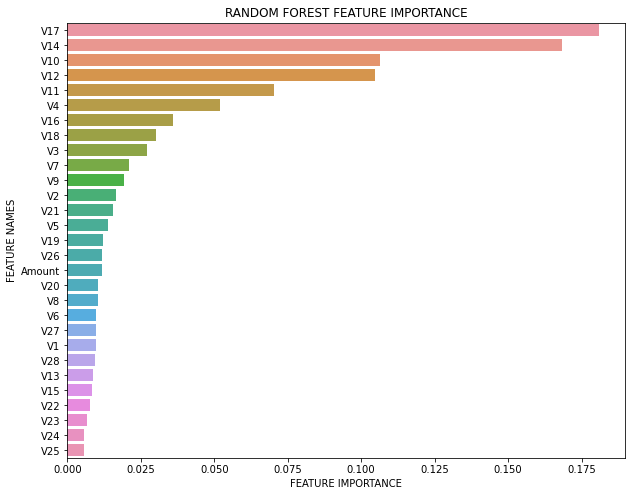

In [72]:
plot_feature_importance(rf1.feature_importances_,cols,'RANDOM FOREST')

In [33]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

/Users/eltonokley/anaconda3/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.8.0 and strictly below 2.11.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.11.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [35]:
X_train.shape
X_train.dtype
y_train.shape

(199364,)

<h1>Neural Network</h1>

In [40]:
from tensorflow.random import set_seed
model2 = keras.models.Sequential([
    keras.layers.Dense(16, input_dim=29, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

set_seed(3)
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc', keras.metrics.Precision(), keras.metrics.Recall()])
model2.fit(X_train, y_train, epochs=40)

Epoch 1/40
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0214 - acc: 0.9985 - precision_1: 0.5843 - recall_1: 0.4319
Epoch 2/40
6231/6231 [==============================] - 8s 1ms/step - loss: 0.0065 - acc: 0.9990 - precision_1: 0.7885 - recall_1: 0.5942
Epoch 3/40
6231/6231 [==============================] - 9s 1ms/step - loss: 0.0053 - acc: 0.9991 - precision_1: 0.8320 - recall_1: 0.6174
Epoch 4/40
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0048 - acc: 0.9992 - precision_1: 0.8571 - recall_1: 0.6783
Epoch 5/40
6231/6231 [==============================] - 11s 2ms/step - loss: 0.0048 - acc: 0.9992 - precision_1: 0.8290 - recall_1: 0.6464
Epoch 6/40
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0046 - acc: 0.9993 - precision_1: 0.8502 - recall_1: 0.7072
Epoch 7/40
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0041 - acc: 0.9993 - precision_1: 0.8824 - recall_1: 0.6957
Epoch 8/40
6231/6231 [========

In [43]:
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                480       
                                                                 
 dense_9 (Dense)             (None, 64)                1088      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 24)                1560      
                                                                 
 dense_11 (Dense)            (None, 1)                 25        
                                                                 
Total params: 3,153
Trainable params: 3,153
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
model2.evaluate(X_test, y_test)

2671/2671 [==============================] - 3s 1ms/step - loss: 0.0051 - acc: 0.9995 - precision_1: 0.8686 - recall_1: 0.8095


[0.005146067589521408,
 0.9994616508483887,
 0.8686131238937378,
 0.8095238208770752]

In [42]:
ann_predicted_probs = model2.predict(X_test)

ann_predicted_probs = ann_predicted_probs.flatten().tolist()
ann_pred = []

for i in ann_predicted_probs:
    if i<0.5:
        flag = 0
    else:
        flag = 1
    ann_pred.append(flag)

ann_pred_classes = np.array(ann_pred)
print(confusion_matrix(y_test, ann_pred_classes))
print(classification_report(y_test, ann_pred_classes))

2671/2671 [==============================] - 2s 820us/step
[[85278    18]
 [   28   119]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.81      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

